# **RNN**

## Recurrent Neural Network (RNN)

Recurrent Neural Networks (RNNs) are a class of artificial neural networks where connections between nodes form a directed graph along a temporal sequence. This allows them to exhibit temporal dynamic behavior. Unlike feedforward neural networks, RNNs can use their internal state (memory) to process sequences of inputs, making them suitable for tasks such as:

- **Time series prediction**: Predicting future values based on previously observed values.
- **Natural language processing (NLP)**: Tasks such as language modeling, text generation, and machine translation.
- **Speech recognition**: Converting spoken language into text.
- **Video analysis**: Understanding and predicting video sequences.

### Key Concepts

1. **Hidden State**: The hidden state is a vector that serves as the memory of the network. It captures information about what has been seen so far in the sequence.

2. **Input Sequence**: RNNs take a sequence of inputs, one at each time step. The input at each time step is combined with the hidden state from the previous time step to produce the current hidden state.

3. **Output Sequence**: Depending on the task, RNNs can produce an output at each time step or only at the final time step.

### Types of RNNs

1. **Vanilla RNN**: The simplest type of RNN where the hidden state is updated using a simple activation function (e.g., tanh or ReLU).

2. **Long Short-Term Memory (LSTM)**: A type of RNN designed to overcome the vanishing gradient problem. LSTMs have a more complex architecture that includes gates to control the flow of information.

3. **Gated Recurrent Unit (GRU)**: A variant of LSTM that combines the forget and input gates into a single update gate, simplifying the architecture.

### Challenges

- **Vanishing Gradient Problem**: During training, gradients can become very small, making it difficult for the network to learn long-range dependencies.
- **Exploding Gradient Problem**: Gradients can become very large, causing the network to become unstable.

### Applications

- **Language Modeling**: Predicting the next word in a sentence.
- **Machine Translation**: Translating text from one language to another.
- **Speech Recognition**: Converting spoken language into text.
- **Time Series Forecasting**: Predicting future values in a time series.


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.models import Sequential
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Generate example data
X = np.random.rand(100, 10, 1)
y = np.random.randint(0, 2, size=(100,))
X.shape, y.shape
((100, 10, 1), (100,))
# Define the model
model = Sequential([
    SimpleRNN(32, input_shape=(10, 1)),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X, y)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.4515 - loss: 0.7325
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5165 - loss: 0.6981 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5401 - loss: 0.6905  
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5174 - loss: 0.6863  
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4997 - loss: 0.6891 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5667 - loss: 0.6800 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5481 - loss: 0.6847 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4998 - loss: 0.6772 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5122 - loss: 0.6723 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5813 - loss: 0.6635 
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5528 - loss: 0.6736
Test Loss: 0.6706064343452454
Test Accuracy: 0.5799999833106995


# **LSTM**

## Long Short-Term Memory (LSTM)

Long Short-Term Memory (LSTM) networks are a type of Recurrent Neural Network (RNN) that are designed to overcome the limitations of traditional RNNs, particularly the vanishing gradient problem. LSTMs are capable of learning long-term dependencies, making them suitable for tasks that require memory of previous inputs over long sequences.

### Key Concepts

1. **Cell State**: The cell state is a vector that runs through the entire LSTM network, with only some minor linear interactions. It acts as a conveyor belt, allowing information to flow unchanged. This helps in preserving the information over long sequences.

2. **Gates**: LSTMs have three gates that regulate the flow of information:
    - **Forget Gate**: Decides what information to discard from the cell state.
    - **Input Gate**: Decides which values from the input to update the cell state.
    - **Output Gate**: Decides what part of the cell state to output.

### LSTM Architecture

1. **Forget Gate**: The forget gate determines which information from the previous cell state should be forgotten. It takes the previous hidden state and the current input and passes them through a sigmoid function to produce a value between 0 and 1 for each number in the cell state \(C_{t-1}\). A value of 1 means "completely keep this" while a value of 0 means "completely forget this".

2. **Input Gate**: The input gate determines which values from the input should be used to update the cell state. It consists of two parts: a sigmoid layer that decides which values to update, and a tanh layer that creates a vector of new candidate values, \( \tilde{C}_t \), that could be added to the cell state.


3. **Cell State Update**: The cell state is updated by combining the previous cell state, scaled by the forget gate, and the new candidate values, scaled by the input gate.

4. **Output Gate**: The output gate determines the next hidden state. It takes the current cell state and passes it through a tanh function to push the values to be between -1 and 1, and then multiplies it by the output of the sigmoid gate.

### Advantages of LSTM

- **Long-Term Memory**: LSTMs can remember information for long periods, making them suitable for tasks that require long-term dependencies.
- **Avoids Vanishing Gradient Problem**: The architecture of LSTMs helps in mitigating the vanishing gradient problem, allowing them to learn from long sequences.

### Applications

- **Language Modeling**: Predicting the next word in a sentence.
- **Machine Translation**: Translating text from one language to another.
- **Speech Recognition**: Converting spoken language into text.
- **Time Series Forecasting**: Predicting future values in a time series.
- **Video Analysis**: Understanding and predicting video sequences.

### Example Code

Here is an example of how to define and train an LSTM model using TensorFlow/Keras:


In [5]:
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential

# Load flight data
flights = sns.load_dataset('flights')

# Convert data to time series
df = pd.DataFrame({'value': flights['passengers'].values}, index=pd.date_range(start='1949-01-01', end='1960-12-01', freq='MS'))
df.head()

,value
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.9507
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5881 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4186 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3962 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2597
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2309
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1786 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1788
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1624
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1719 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1824 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1517
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1802
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1646
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1719 
Epoch 16/100
4/4 

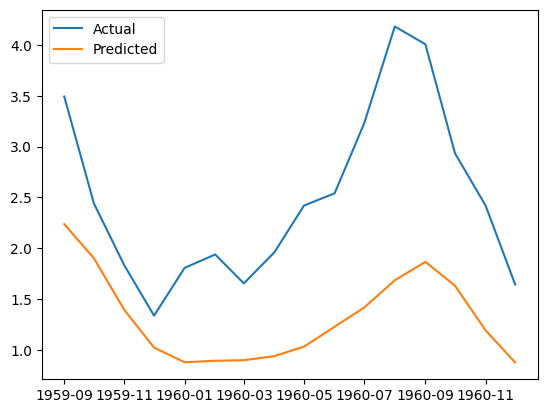

In [6]:
# Split data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Normalize the data
train_mean = train_data.mean()
train_std = train_data.std()
train_data = (train_data - train_mean) / train_std
test_data = (test_data - train_mean) / train_std

# Convert data to sequences
def to_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data)-seq_length-1):
        X_seq = data[i:(i+seq_length)].values
        X.append(X_seq)
        y_seq = data.iloc[i+seq_length].values[0]
        y.append(y_seq)
    return np.array(X), np.array(y)

seq_length = 12
X_train, y_train = to_sequences(train_data, seq_length)
X_test, y_test = to_sequences(test_data, seq_length)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the model
model = Sequential([
    LSTM(32, input_shape=(seq_length, 1)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

# Make predictions on test data
y_pred = model.predict(X_test)

# Plot the predictions and actual values
import matplotlib.pyplot as plt
plt.plot(test_data.index[seq_length+1:], y_test, label='Actual')
plt.plot(test_data.index[seq_length+1:], y_pred, label='Predicted')
plt.legend()
plt.show()

### Character-level text generator using a sample text. We'll use a sequence-to-sequence prediction approach to predict the next character in a sequence.

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Sample text data
text = "hello world! this is a simple text example for rnn."
chars = sorted(list(set(text))) # Get unique characters
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))

# Create input-output sequences
seq_length = 10
X = []
y = []

for i in range(len(text) - seq_length):
    seq_in = text[i:i + seq_length]
    seq_out = text[i + seq_length]
    X.append([char_to_int[char] for char in seq_in])
    y.append(char_to_int[seq_out])

X = np.reshape(X, (len(X), seq_length, 1)) / float(len(chars)) # Normalize
y = tf.keras.utils.to_categorical(y)

# Define model
model = Sequential([
    LSTM(128, input_shape=(X.shape[1], X.shape[2])),
    Dense(len(chars), activation='softmax')
])

# Compile and train
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(X, y, epochs=100, batch_size=10, verbose=1)

# Predict a sequence
start = np.random.randint(0, len(X)-1)
pattern = X[start]
print("Seed:")
print("\"", ''.join([int_to_char[int(value*len(chars))] for value in pattern]), "\"")

for i in range(50): # Generate 50 characters
    x = np.reshape(pattern, (1, len(pattern), 1))
    prediction = model.predict(x, verbose=1)
    index = np.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[int(value*len(chars))] for value in pattern]
    print(result, end="")
    pattern = np.append(pattern, index/float(len(chars)))
    pattern = pattern[1:len(pattern)]

print("\n")


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 2.9447
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.9140
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.8877
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.8674
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.8016
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 2.8291
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.7069
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.8182
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 2.6860
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 2.6700
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.6693
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2.7740
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6839
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.7086
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.7654
Epoch 16/100
5/5 ━━

# **GRU**

## Gated Recurrent Unit (GRU)

Gated Recurrent Units (GRUs) are a type of Recurrent Neural Network (RNN) that aim to solve the vanishing gradient problem faced by traditional RNNs. GRUs are similar to Long Short-Term Memory (LSTM) networks but have a simpler architecture, making them computationally more efficient.

### Key Concepts

1. **Hidden State**: The hidden state in GRUs serves as the memory of the network, capturing information about what has been seen so far in the sequence.

2. **Gates**: GRUs have two gates that regulate the flow of information:
    - **Update Gate**: Decides how much of the past information needs to be passed along to the future.
    - **Reset Gate**: Decides how much of the past information to forget.

### GRU Architecture

1. **Update Gate**: The update gate determines how much of the past information needs to be passed along to the future. It takes the previous hidden state and the current input and passes them through a sigmoid function to produce a value between 0 and 1. A value of 1 means "completely keep this" while a value of 0 means "completely forget this".

2. **Reset Gate**: The reset gate determines how much of the past information to forget. It also takes the previous hidden state and the current input and passes them through a sigmoid function to produce a value between 0 and 1.

3. **Current Memory Content**: The current memory content is created by combining the reset gate and the previous hidden state. This helps in deciding which parts of the previous hidden state to forget.

4. **Final Memory at Current Time Step**: The final memory at the current time step is a combination of the update gate and the current memory content. This helps in deciding how much of the current memory content to keep.

### Advantages of GRU

- **Simpler Architecture**: GRUs have a simpler architecture compared to LSTMs, making them computationally more efficient.
- **Avoids Vanishing Gradient Problem**: The architecture of GRUs helps in mitigating the vanishing gradient problem, allowing them to learn from long sequences.
- **Fewer Parameters**: GRUs have fewer parameters compared to LSTMs, which can lead to faster training and less overfitting.

### Applications

- **Language Modeling**: Predicting the next word in a sentence.
- **Machine Translation**: Translating text from one language to another.
- **Speech Recognition**: Converting spoken language into text.
- **Time Series Forecasting**: Predicting future values in a time series.
- **Video Analysis**: Understanding and predicting video sequences.

### Example Code

Here is an example of how to define and train a GRU model using TensorFlow/Keras:


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 1.1269
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.1283
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.0069
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7286
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6062
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5408 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3931
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3597
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2957
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2784
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2259 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2100
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1870
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1776
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2048
Epoch 16/100
4/4 ━

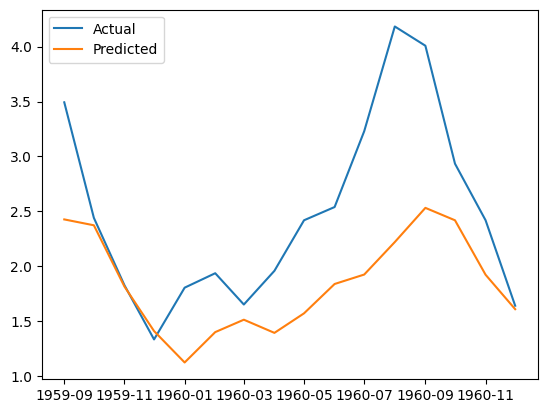

In [8]:
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, GRU  # Note the change here
from tensorflow.keras.models import Sequential

# Load flight data
flights = sns.load_dataset('flights')

# Convert data to time series
df = pd.DataFrame({'value': flights['passengers'].values}, index=pd.date_range(start='1949-01-01', end='1960-12-01', freq='MS'))

# Split data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Normalize the data
train_mean = train_data.mean()
train_std = train_data.std()
train_data = (train_data - train_mean) / train_std
test_data = (test_data - train_mean) / train_std

# Convert data to sequences
def to_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data)-seq_length-1):
        X_seq = data[i:(i+seq_length)].values
        X.append(X_seq)
        y_seq = data.iloc[i+seq_length].values[0]
        y.append(y_seq)
    return np.array(X), np.array(y)

seq_length = 12
X_train, y_train = to_sequences(train_data, seq_length)
X_test, y_test = to_sequences(test_data, seq_length)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the model using GRU
model = Sequential([
    GRU(32, input_shape=(seq_length, 1)),  # Note the change here
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

# Make predictions on test data
y_pred = model.predict(X_test)

# Plot the predictions and actual values
import matplotlib.pyplot as plt
plt.plot(test_data.index[seq_length+1:], y_test, label='Actual')
plt.plot(test_data.index[seq_length+1:], y_pred, label='Predicted')
plt.legend()
plt.show()

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense  # Import GRU instead of LSTM

# Sample text data
text = "hello world! this is a simple text example for rnn."
chars = sorted(list(set(text)))  # Get unique characters
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))

# Create input-output sequences
seq_length = 10
X = []
y = []

for i in range(len(text) - seq_length):
    seq_in = text[i:i + seq_length]
    seq_out = text[i + seq_length]
    X.append([char_to_int[char] for char in seq_in])
    y.append(char_to_int[seq_out])

X = np.reshape(X, (len(X), seq_length, 1)) / float(len(chars))  # Normalize
y = tf.keras.utils.to_categorical(y)

# Define model using GRU
model = Sequential([
    GRU(128, input_shape=(X.shape[1], X.shape[2])),  # Change LSTM to GRU here
    Dense(len(chars), activation='softmax')
])

# Compile and train
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(X, y, epochs=100, batch_size=10, verbose=1)

# Predict a sequence
start = np.random.randint(0, len(X)-1)
pattern = X[start]
print("Seed:")
print("\"", ''.join([int_to_char[int(value*len(chars))] for value in pattern]), "\"")

for i in range(50):  # Generate 50 characters
    x = np.reshape(pattern, (1, len(pattern), 1))
    prediction = model.predict(x, verbose=0)
    index = np.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[int(value*len(chars))] for value in pattern]
    print(result, end="")
    pattern = np.append(pattern, index/float(len(chars)))
    pattern = pattern[1:len(pattern)]

print("\n")

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 2.9513
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.9133
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.8894
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.8652
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.8332 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.7705
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.7860
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.7409
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2.7272
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.7717
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6832
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.7935
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.6706
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.6648
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.6635
Epoch 16/100
5/5 ━